# Maestría en CIENCIAS DE DATOS Y BIG DATA V1E4
#### 09. MACHINE LEARNING: APRENDIZAJE SUPÉRVISADO
#### Docente: Msc. Renzo Claure Aracena.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/drug.csv')
df.head(14)

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355,drugY
1,1,47,M,LOW,HIGH,13.093,drugC
2,2,47,M,LOW,HIGH,10.114,drugC
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY
5,5,22,F,NORMAL,HIGH,8.607,drugX
6,6,49,F,NORMAL,HIGH,16.275,drugY
7,7,41,M,LOW,HIGH,11.037,drugC
8,8,60,M,NORMAL,HIGH,15.171,drugY
9,9,43,M,LOW,NORMAL,19.368,drugY


In [3]:
df.shape

(200, 7)

In [4]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

In [5]:
#Trataiento de los datos
#Aplicaremos Label Encoding
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X.iloc[:,1] = le_sex.transform(X.iloc[:,1]) 

In [6]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X.iloc[:,2] = le_BP.transform(X.iloc[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X.iloc[:,3] = le_Chol.transform(X.iloc[:,3]) 

X.iloc[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [7]:
#Variable objetivo
y = df["Drug"]

In [8]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [9]:
#Muestreo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
y_pred_train = drugTree.predict(X_train)
y_pred_test = drugTree.predict(X_test)

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt


In [14]:
print("Acierto del arbol de decisión para ent.: ", metrics.accuracy_score(y_train, y_pred_train) )
print("Acierto del arbol de decisión para comp.: ", metrics.accuracy_score(y_test, y_pred_test))

Acierto del arbol de decisión para ent.:  1.0
Acierto del arbol de decisión para comp.:  0.9857142857142858


In [ ]:
#Esto se debe instalar en el CMD: winget install -e --id Graphviz.Graphviz
#Vaerificar dot -V
#pip install pydotplus
#pip install six

In [19]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [21]:
import six
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [22]:
feature_names = X.columns
target_names = y.unique()

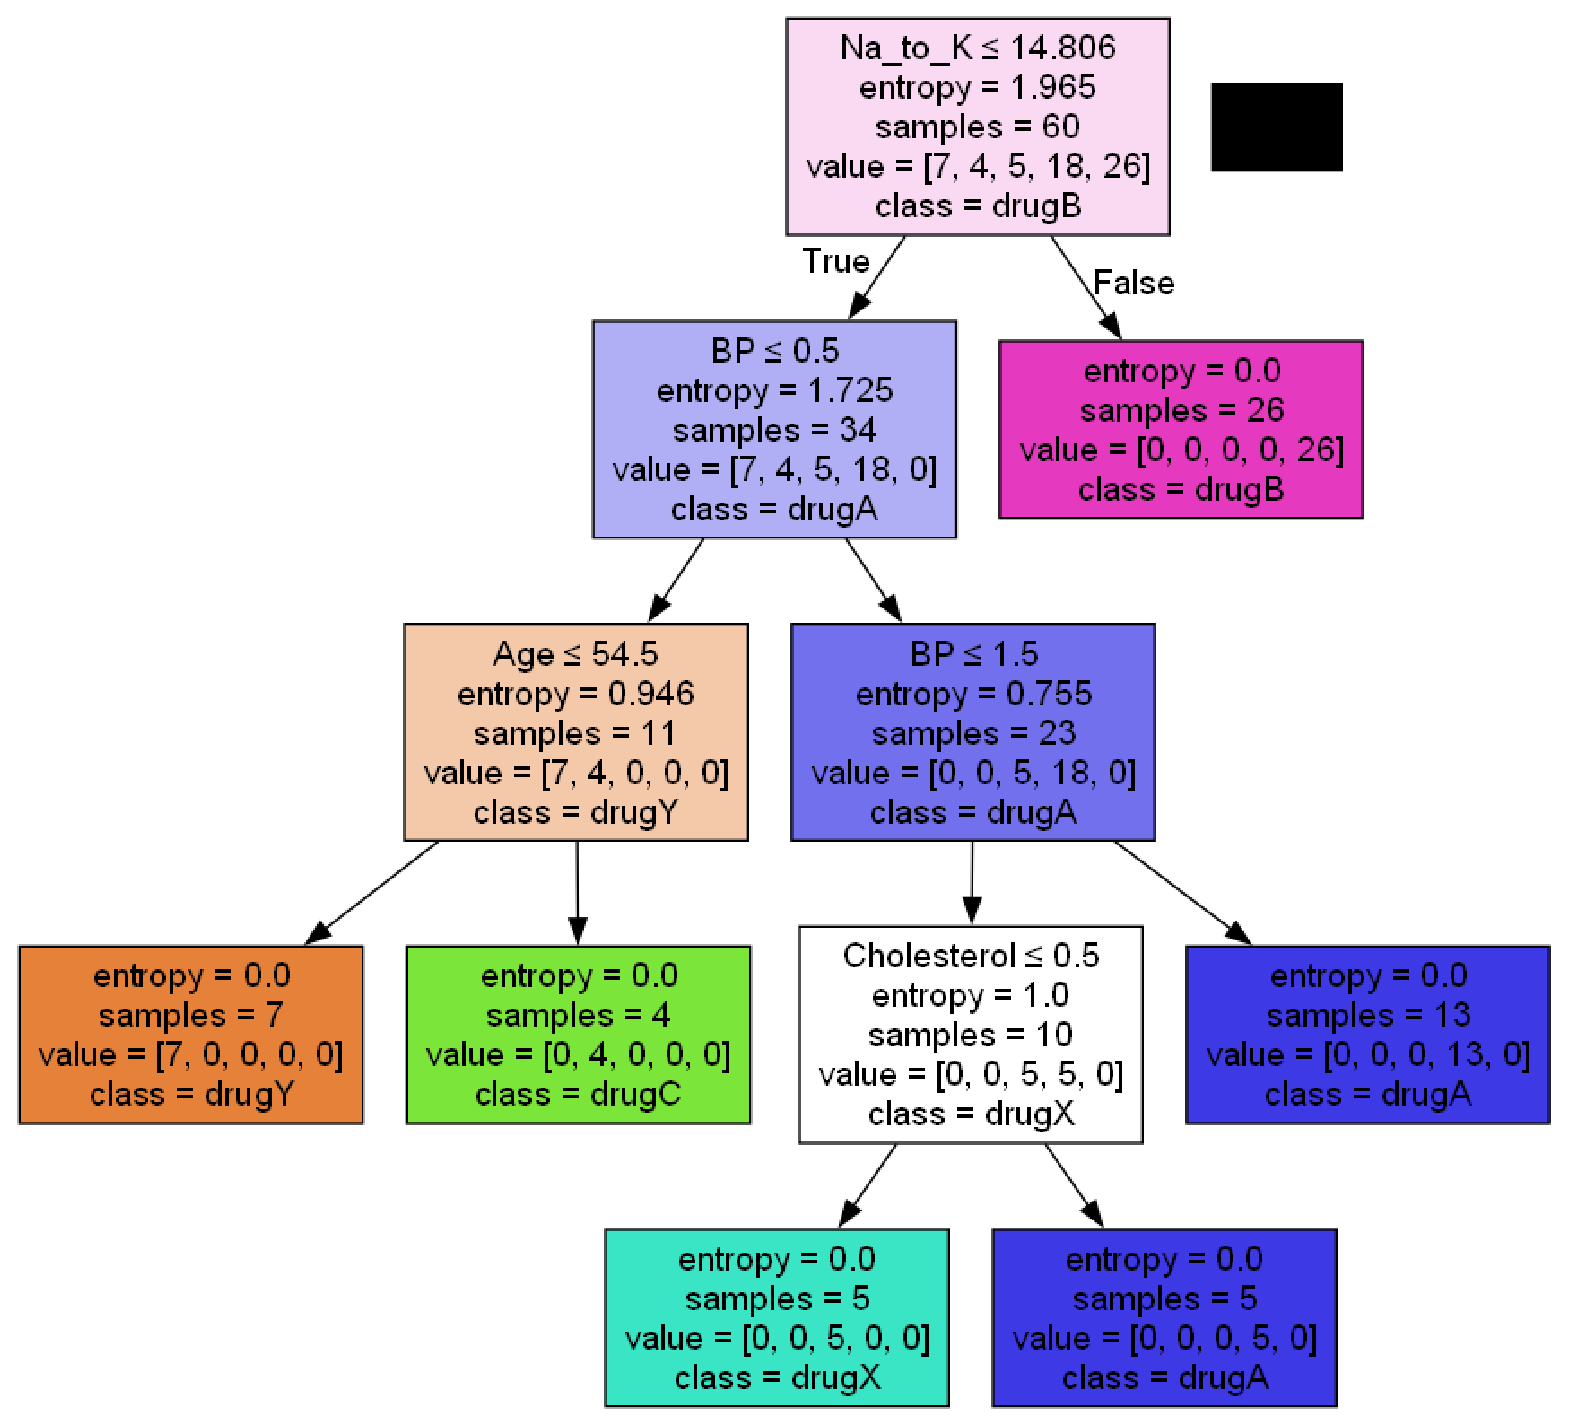

In [23]:
dot_data = StringIO()
filename = "drugtree.png"
out = tree.export_graphviz(drugTree, feature_names=feature_names, out_file=dot_data, class_names=target_names, filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img, interpolation='nearest')
plt.axis('off')
plt.show()

### Pruning, poda
 Recortando el tamaño del Árbol, acotando el tamaño


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clasif = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('El score en entrenamiento es: {:.4f}'.format(clasif.score(X_train, y_train)))
print('El score en comprobacion es: {:.4f}'.format(clasif.score(X_test, y_test)))

 Recortando el tamaño del Árbol, limitando los casos por hoja

In [ ]:
clasif = DecisionTreeClassifier( min_samples_leaf=20   )
clasif.fit(X_train, y_train)
print('El score en entrenamiento es: {:.4f}'.format(clasif.score(X_train, y_train)))
print('El score en comprobacion es: {:.4f}'.format(clasif.score(X_test, y_test)))

### Importancia de las variables
#### Feature importance

In [ ]:
feature_importance = clasif.feature_importances_

#Despleagremos el resultado en un dataframe para mejor lectura
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
